#  <center> Perovskite Materials <center>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import plot_confusion_matrix
import pandas as pd, numpy as np
import matplotlib

import matplotlib

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('lines', linewidth=3, color='g')
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams["xtick.major.size"] = 6
matplotlib.rcParams["ytick.major.size"] = 6
matplotlib.rcParams["ytick.major.width"] = 2
matplotlib.rcParams["xtick.major.width"] = 2
matplotlib.rcParams['text.usetex'] = False

### Download required data 

In [ ]:
! wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps2/data/mendeleev.csv
! wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps2/data/perov_train.csv
! wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps2/data/perov_val.csv
! wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps2/data/perov_alloy.csv
! wget https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps2/data/elements.npy

--2021-03-14 22:34:33--  https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps2/data/mendeleev.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8599 (8.4K) [text/plain]
Saving to: ‘mendeleev.csv’

mendeleev.csv       100%[===================>]   8.40K  --.-KB/s    in 0s      

2021-03-14 22:34:33 (62.9 MB/s) - ‘mendeleev.csv’ saved [8599/8599]

--2021-03-14 22:34:34--  https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps2/data/perov_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732994 (716

## Modeling Unalloyed Perovskites

### 1.1 Encoding chemical elements into feature vectors

In [ ]:

from sklearn.utils import shuffle

perov = pd.read_csv("perov_train.csv") # read data 
all_elements = np.load('./elements.npy', allow_pickle=True) # Read all elements 

# Your code to featurize chemical elements 
lenX = len(perov)
lenE = len(all_elements)

lb = preprocessing.LabelBinarizer()
lb.fit(all_elements)

A_site = lb.transform(perov["A"])
B_site = lb.transform(perov["B"])

#A_site = np.zeros((lenX,lenE))
#B_site = np.zeros((lenX,lenE))

# for i in range(lenX):
#  A_site[i] = lb.transform(perov.loc[i, ["A"]])
#  B_site[i] = lb.transform(perov.loc[i, ["B"]])

sites = np.hstack((A_site,B_site))


### 1.2 Modeling with Ridge Regression

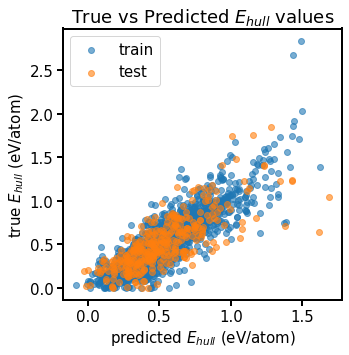

Ridge Regression training R^2 score: 0.728591555284214
Ridge Regression testing R^2 score: 0.5729033897950133


In [ ]:

# Extract feature vector (sites) and e_above_hull
x = sites
y = perov['e_above_hull'].to_numpy()

# Split data with 80%/20% ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train Ridge Regressor
clf = Ridge()
clf.fit(x_train, y_train)

# Report training and test score in R^2
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)

# Scatter plot 

plt.figure(figsize=(5,5))

n_samples = 0.8*lenX
train_prediction =  clf.predict(x_train)
train_truth =  y_train

test_prediction = clf.predict(x_test)
test_truth = y_test

plt.scatter(train_prediction, train_truth, label='train', alpha=0.6)
plt.scatter(test_prediction, test_truth, label='test', alpha=0.6)

plt.title("True vs Predicted $E_{hull}$ values")
plt.ylabel("true $E_{hull}$ (eV/atom)")
plt.xlabel("predicted $E_{hull}$ (eV/atom)")
plt.legend()
plt.show()

print("Ridge Regression training R^2 score: {}".format(train_score))
print("Ridge Regression testing R^2 score: {}".format(test_score))


### 1.3 Modeling with a Multi-Layer Perceptron

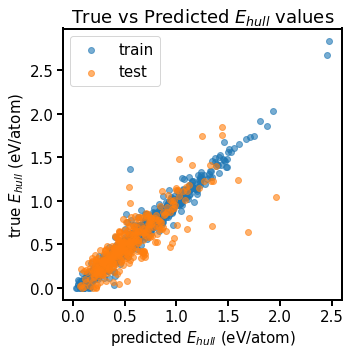

MLP Regression training R^2 score: 0.9655479277930494
MLP Regression testing R^2 score: 0.7044197194764972


In [ ]:

# Define hyperparameters
hidden_layer_sizes = (256,256,256)

# Train multi-layer perceptron
MLPR = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=0.16, early_stopping=True)
MLPR.fit(x_train, y_train)

## Calculate scores/predictions and create plot
# Report training and test score in R^2
MLPR_train_score = MLPR.score(x_train,y_train)
MLPR_test_score = MLPR.score(x_test,y_test)

## Scatter Plot

plt.figure(figsize=(5,5))

MLPR_train_prediction =  MLPR.predict(x_train)
MLPR_train_truth =  y_train

MLPR_test_prediction = MLPR.predict(x_test)
MLPR_test_truth = y_test

plt.scatter(MLPR_train_prediction, MLPR_train_truth, label='train', alpha=0.6)
plt.scatter(MLPR_test_prediction, MLPR_test_truth, label='test', alpha=0.6)

plt.title("True vs Predicted $E_{hull}$ values")
plt.ylabel("true $E_{hull}$ (eV/atom)")
plt.xlabel("predicted $E_{hull}$ (eV/atom)")
plt.legend()
plt.show()


print("MLP Regression training R^2 score: {}".format(MLPR_train_score))
print("MLP Regression testing R^2 score: {}".format(MLPR_test_score))


In [ ]:
# Get total number of parameters

def total_param(l=[]):
  s = 0
  for i in range(len(l)-1):
      s=s+l[i]*l[i+1]+l[i+1]
  return s

# The input layer has as many neurons as the number of features
# Output is just the scalar value (E_hull)
input = len(x_train[1])
hidden = 256
output = 1

params = total_param([input,hidden,hidden,hidden,output]) 


Total number of trainable parameters in the MLP model is: 169473
The hyperparameter: hidden_layer_sizes = (256,256,256) 
means we have 3 hidden layers (depth=3)
with 256 neurons (width=256) per hidden layer.


### 1.4 Chemical transferability of One-hot representations

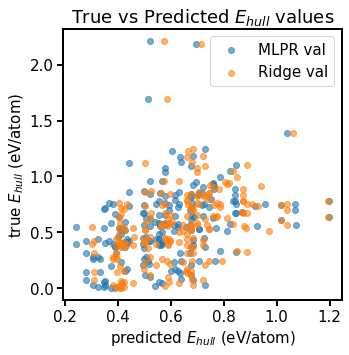

MLP validation R^2 score 0.10187856350418634
Ridge validation R^2 score 0.09941118370096935


In [ ]:

# Load the validation dataset which contains element composistion not seen in training data
perov_val = pd.read_csv("perov_val.csv") 

x1_val = lb.transform(perov_val["A"])
x2_val = lb.transform(perov_val["B"])

x_val = np.hstack((x1_val,x2_val))
y_val = perov_val['e_above_hull'].to_numpy()

## Calculate scores/predictions and create plot
# Report training and test score in R^2
MLPR_val_score = MLPR.score(x_val,y_val)
Ridge_val_score = clf.score(x_val,y_val)

## Scatter Plot

plt.figure(figsize=(5,5))

MLPR_val_prediction =  MLPR.predict(x_val)

Ridge_val_prediction = clf.predict(x_val)

plt.scatter(MLPR_val_prediction, y_val, label='MLPR val', alpha=0.6)
plt.scatter(Ridge_val_prediction, y_val, label='Ridge val', alpha=0.6)

plt.title("True vs Predicted $E_{hull}$ values")
plt.ylabel("true $E_{hull}$ (eV/atom)")
plt.xlabel("predicted $E_{hull}$ (eV/atom)")
plt.legend()
plt.show()

print("MLP validation R^2 score", MLPR_val_score)
print("Ridge validation R^2 score", Ridge_val_score)


### 1.5  Featurize Perovskites with physical descriptors

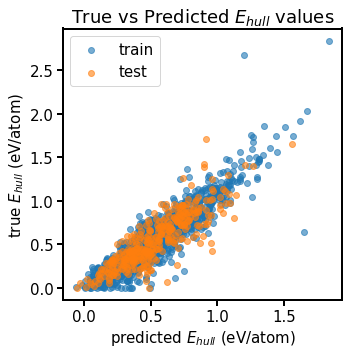

Training R^2 score: 0.8164931984535992
Training R^2 score: 0.7227384114182291


In [ ]:

from sklearn.preprocessing import StandardScaler

elements_pd = pd.read_csv("mendeleev.csv")
elements_pd = elements_pd.set_index('symbol')

# Scale feature vectors while retaining the DataFrame format
scaler = StandardScaler()
elements_pd[elements_pd.columns] = scaler.fit_transform(elements_pd[elements_pd.columns])

# Featurize samples with physical descriptors
# Convert from DataFrame to numpy array
A_site = elements_pd.loc[perov["A"]].to_numpy()
B_site = elements_pd.loc[perov["B"]].to_numpy()

# Stack A and B sites horizontally to final input vector
X = np.hstack((A_site,B_site))

# Split training and test data with 80%/20% ratio
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define hyperparameters
hidden_layer_sizes = (256,256,256)

# Train multi-layer perceptron
MLPR2 = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=0.16, early_stopping=True)
MLPR2.fit(X_scaled_train, y_train)

## Calculate scores/predictions and create plot
# Report training and test score in R^2
MLPR2_train_score = MLPR2.score(X_scaled_train,y_train)
MLPR2_test_score = MLPR2.score(X_scaled_test,y_test)

## Scatter Plot

plt.figure(figsize=(5,5))

MLPR2_train_prediction =  MLPR2.predict(X_scaled_train)

MLPR2_test_prediction = MLPR2.predict(X_scaled_test)

plt.scatter(MLPR2_train_prediction, y_train, label='train', alpha=0.6)
plt.scatter(MLPR2_test_prediction, y_test, label='test', alpha=0.6)

plt.title("True vs Predicted $E_{hull}$ values")
plt.ylabel("true $E_{hull}$ (eV/atom)")
plt.xlabel("predicted $E_{hull}$ (eV/atom)")
plt.legend()
plt.show()

print("Training R^2 score: {}".format(MLPR2_train_score) )
print("Test R^2 score: {}".format(MLPR2_test_score) )


### 1.6 Chemical transferability of Physical Descriptors 

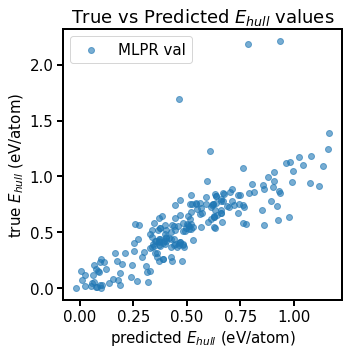

validation R^2 score: 0.6264158481564412


In [ ]:
## For the validation set, encode perov features with atomic descriptor 

# Featurize samples with physical descriptors
# Convert from DataFrame to numpy array
X1_val = elements_pd.loc[perov_val["A"]].to_numpy()
X2_val = elements_pd.loc[perov_val["B"]].to_numpy()

X_val = np.hstack((X1_val,X2_val))

## Calculate scores/predictions and create plot
# Report training and test score in R^2
MLPR2_val_score = MLPR2.score(X_val,y_val)

## Scatter Plot

plt.figure(figsize=(5,5))

MLPR2_val_prediction =  MLPR2.predict(X_val)

plt.scatter(MLPR2_val_prediction, y_val, label='MLPR val', alpha=0.6)

plt.title("True vs Predicted $E_{hull}$ values")
plt.ylabel("true $E_{hull}$ (eV/atom)")
plt.xlabel("predicted $E_{hull}$ (eV/atom)")
plt.legend()
plt.show()

print("validation R^2 score: {}".format( MLPR2_val_score ))


## Modeling Alloyed(Hybrid) Perovskites

### 2.1 Encoding Compositional Information

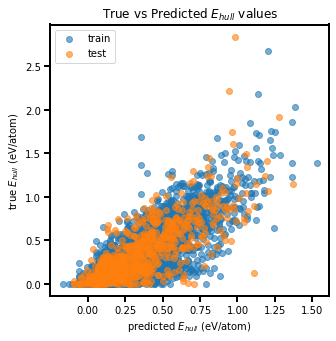

training R^2 score : 0.6800609404472522
testing R^2 score : 0.6543644714773456


In [ ]:
# load data 
cry = pd.read_csv("perov_alloy.csv")

import json
def str2dict(dicstr):
    return json.loads(json.loads(dicstr))

cry["A"] = cry['A'].apply(str2dict)
cry["B"] = cry['B'].apply(str2dict)

# Featurize alloys with bit vector represetation
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()

cry_A = vec.fit_transform(cry["A"]).toarray()
cry_B = vec.fit_transform(cry["B"]).toarray()

X_alloy = np.hstack((cry_A,cry_B))
y_alloy = cry['e_above_hull'].to_numpy()

# Split data with 80%/20% ratio
X_alloy_train, X_alloy_test, y_alloy_train, y_alloy_test = train_test_split(X_alloy, y_alloy, test_size=0.2)

# Define hyperparameters
hidden_layer_sizes = (50)

# Train multi-layer perceptron
MLPA = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='tanh', solver='adam', alpha=0.0001, early_stopping=False)
MLPA.fit(X_alloy_train, y_alloy_train)

## Calculate scores/predictions and create plot
# Report training and test score in R^2
MLPA_train_score = MLPA.score(X_alloy_train,y_alloy_train)
MLPA_test_score = MLPA.score(X_alloy_test,y_alloy_test)

## Scatter Plot

plt.figure(figsize=(5,5))

MLPA_train_prediction =  MLPA.predict(X_alloy_train)
MLPA_test_prediction = MLPA.predict(X_alloy_test)

plt.scatter(MLPA_train_prediction, y_alloy_train, label='train', alpha=0.6)
plt.scatter(MLPA_test_prediction, y_alloy_test, label='test', alpha=0.6)

plt.title("True vs Predicted $E_{hull}$ values")
plt.ylabel("true $E_{hull}$ (eV/atom)")
plt.xlabel("predicted $E_{hull}$ (eV/atom)")
plt.legend()
plt.show()

print("training R^2 score : {}".format(MLPA_train_score))
print("testing R^2 score : {}".format(MLPA_test_score))


### 2.1 Optimize Neural Network Architectures with HyperOpt

In [ ]:

from hyperopt import hp
from hyperopt import fmin, tpe, space_eval, Trials
from sklearn.model_selection import cross_val_score


def hyperoptoutput2param(best):
    
    '''Change hyperopt output to dictionary with values '''
    
    for key in best.keys():
        if key in hyper_dict.keys():
            best[key] = hyper_dict[key][ best[key] ] 
            
    return best

# Define a dicionary for each parameter range 

hyper_dict = {
    "depth": [1, 2, 3],
    "width": [64, 128, 192, 256],
    "optimizer": ['sgd', 'adam'],
    "activation": ['relu', 'tanh'],
    "alpha":[0.08, 0.16, 0.32, 0.64]
}

parameter_space =  { "depth": hp.choice("depth", hyper_dict['depth']),
                    "width": hp.choice("width", hyper_dict['width']),
                    "optimizer": hp.choice("optimizer", hyper_dict['optimizer']), 
                    "activation": hp.choice("activation", hyper_dict['activation']), 
                    "alpha": hp.choice("alpha", hyper_dict['alpha'])
                    }


# Evaluation function 

def model_eval(args):

    '''Take suggested arguments and perform model evaluation'''
    
    # generate tuple input for hidden_layer_sizes 
    hidden_layers = tuple( [args['width']] * args['depth'] )
    activation = args['activation']
    solver = args['optimizer']
    alpha = args['alpha']
    
    MLP_cv = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation, solver=solver, alpha=alpha, max_iter=5000, early_stopping=False)
    crossval = cross_val_score(MLP_cv, X_alloy_train, y_alloy_train, cv=5)
    cv_score = np.mean(crossval)
    return -cv_score


print("Start trials") 

trials = Trials()
best = fmin(model_eval, parameter_space, algo=tpe.suggest, max_evals=40, trials=trials)
best = hyperoptoutput2param(best)

print("best parameter set: {}".format(best))
print("best cv {}".format(-trials.best_trial['result']['loss']))


Start trials
100%|██████████| 40/40 [48:10<00:00, 72.26s/it, best loss: -0.7713413585930544]
best parameter set: {'activation': 'relu', 'alpha': 0.08, 'depth': 3, 'optimizer': 'adam', 'width': 64}
best cv 0.7713413585930544


Train a MLP with the hyperparameters obtained

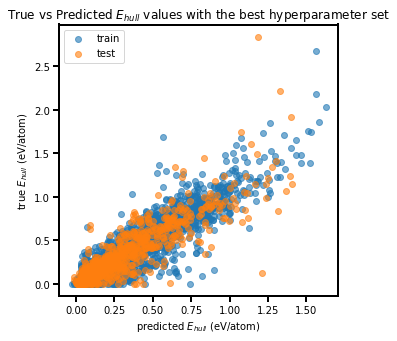

training R^2 score : 0.8585713292936827
testing R^2 score : 0.7870847538001966


In [ ]:
# record best hyperparameter set
hid_lay_best = tuple( [best['width']] * best['depth'] )
act_best = best['activation']
sol_best = best['optimizer']
alpha_best = best['alpha']
# Train multi-layer perceptron
MLP_best = MLPRegressor(hidden_layer_sizes=hid_lay_best, activation=act_best, solver=sol_best, alpha=alpha_best, early_stopping=False)
MLP_best.fit(X_alloy_train, y_alloy_train)

## Calculate scores/predictions and create plot
# Report training and test score in R^2
MLP_best_train_score = MLP_best.score(X_alloy_train,y_alloy_train)
MLP_best_test_score = MLP_best.score(X_alloy_test,y_alloy_test)

## Scatter Plot

plt.figure(figsize=(5,5))

MLP_best_train_prediction =  MLP_best.predict(X_alloy_train)
MLP_best_test_prediction = MLP_best.predict(X_alloy_test)

plt.scatter(MLP_best_train_prediction, y_alloy_train, label='train', alpha=0.6)
plt.scatter(MLP_best_test_prediction, y_alloy_test, label='test', alpha=0.6)

plt.title("True vs Predicted $E_{hull}$ values with the best hyperparameter set")
plt.ylabel("true $E_{hull}$ (eV/atom)")
plt.xlabel("predicted $E_{hull}$ (eV/atom)")
plt.legend()
plt.show()

print("training R^2 score : {}".format(MLP_best_train_score))
print("testing R^2 score : {}".format(MLP_best_test_score))


### 2.3 Classifying electronic properties of alloyed perovskites eith MLPs

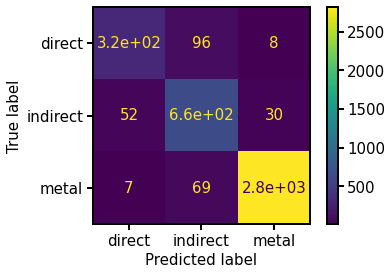

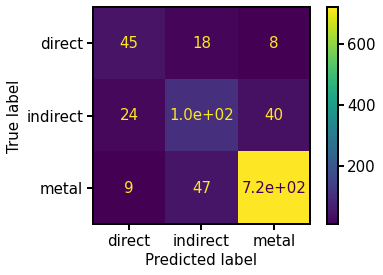

In [ ]:
# load data 
cry = pd.read_csv("perov_alloy.csv")

import json
def str2dict(dicstr):
    return json.loads(json.loads(dicstr))

cry["A"] = cry['A'].apply(str2dict)
cry["B"] = cry['B'].apply(str2dict)

# Featurize alloys with bit vector represetation
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()

cry_A = vec.fit_transform(cry["A"]).toarray()
cry_B = vec.fit_transform(cry["B"]).toarray()

X_class = np.hstack((cry_A,cry_B))
y_class = cry['class']

# Split data with 80%/20% ratio
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2)

# Define hyperparameters
hidden_layers_class = tuple( [64] * 3 )
act_class = 'relu'
sol_class = 'adam'
alpha_class = 0.08

# Train multi-layer perceptron
MLPC = MLPClassifier(hidden_layer_sizes=hidden_layers_class, activation=act_class, solver=sol_class, alpha=alpha_class, max_iter=5000, early_stopping=False)
MLPC.fit(X_class_train, y_class_train)

plot_confusion_matrix(MLPC, X_class_train, y_class_train)  
plot_confusion_matrix(MLPC, X_class_test, y_class_test)  
plt.show() 
